In [1]:
import math

# Summation Unit: Computes the weighted sum of the inputs
def summation_unit(inputs, weights):
    return sum(i * w for i, w in zip(inputs, weights))

# Step Function: Returns 1 if the input is greater than or equal to 0, else returns 0
def step_function(x):
    return 1 if x >= 0 else 0

# Bipolar Step Function: Returns 1 if the input is greater than or equal to 0, else returns -1
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid Function: Maps input to a value between 0 and 1
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# TanH Function: Maps input to a value between -1 and 1
def tanh(x):
    return math.tanh(x)

# ReLU (Rectified Linear Unit) Function: Returns input if positive, else returns 0
def relu(x):
    return max(0, x)

# Leaky ReLU Function: Returns input if positive, else returns a small value proportional to the input (alpha * x)
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# Error Calculation: Returns the difference between the actual value and the predicted value
def error_calculation(predicted, actual):
    return actual - predicted


Final Weights: [-0.10000000000000765, 0.1000000000000001, 0.05000000000000032]
Epochs until convergence: 129


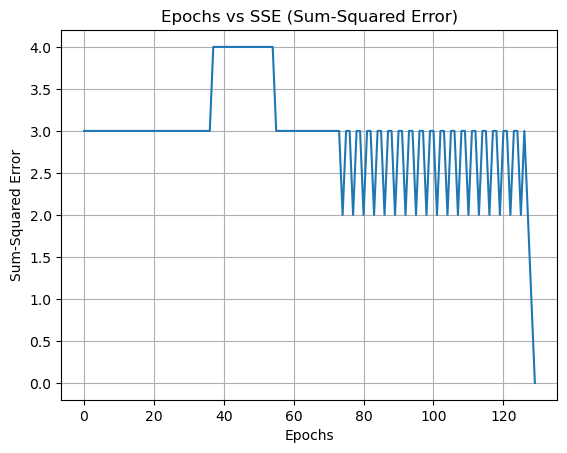

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step Activation Function (used to learn AND gate logic)
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron Training Function
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            # Get the prediction using step activation function
            predicted = step_activation(summation)
            # Calculate error
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # Update weights and bias
            W[0] = W[0] + alpha * error  # Bias update
            W[1] = W[1] + alpha * error * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs (AND logic)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set learning rate and max epochs
alpha = 0.05  # Learning rate
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Train the perceptron
final_weights, epochs, errors = train_perceptron(X, y, W, alpha, max_epochs, error_threshold)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Epochs until convergence: {epochs}")

# Plotting Epochs vs SSE (Sum Squared Error)
plt.plot(range(epochs+1), errors)
plt.title("Epochs vs SSE (Sum-Squared Error)")
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.show()


Final Weights: [-0.2999999999999812, 0.19999999999999998, 0.15000000000000005]
Epochs until convergence: 67


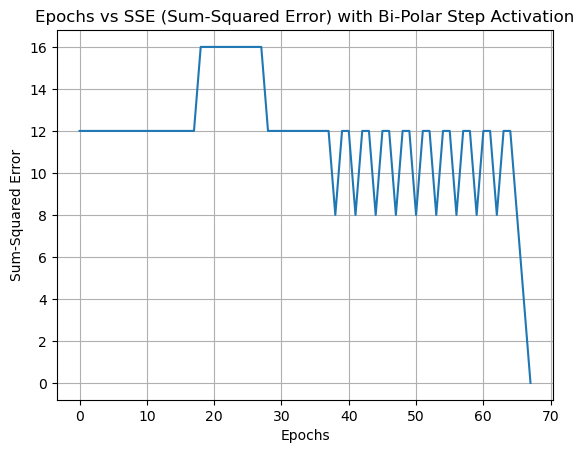

In [4]:
#bipolar
import numpy as np
import matplotlib.pyplot as plt

# Bi-Polar Step Activation Function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Perceptron Training Function
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            # Get the prediction using bipolar step activation function
            predicted = bipolar_step_activation(summation)
            # Calculate error
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # Update weights and bias
            W[0] = W[0] + alpha * error  # Bias update
            W[1] = W[1] + alpha * error * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs for Bi-Polar AND logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([-1, -1, -1, 1])  # Bi-Polar AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set learning rate and max epochs
alpha = 0.05  # Learning rate
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Train the perceptron
final_weights, epochs, errors = train_perceptron(X, y, W, alpha, max_epochs, error_threshold)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Epochs until convergence: {epochs}")

# Plotting Epochs vs SSE (Sum Squared Error)
plt.plot(range(epochs+1), errors)
plt.title("Epochs vs SSE (Sum-Squared Error) with Bi-Polar Step Activation")
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.show()


Final Weights: [9.991014567952307, 0.1981319024231986, -0.7548371371076595]
Epochs until convergence: 1000


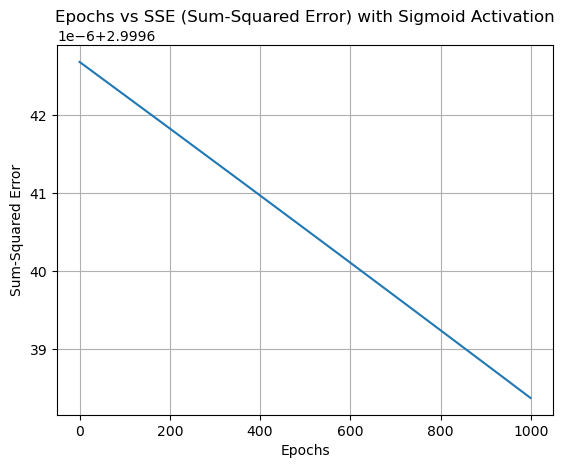

In [7]:
#Sigmod function
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Perceptron Training Function
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            # Get the prediction using sigmoid activation function
            predicted = sigmoid_activation(summation)
            # Calculate error (as the difference between expected and predicted output)
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # Sigmoid gradient for weight update
            gradient = predicted * (1 - predicted)
            
            # Update weights and bias using the error and gradient
            W[0] = W[0] + alpha * error * gradient  # Bias update
            W[1] = W[1] + alpha * error * gradient * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * gradient * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs (AND logic for binary values 0 and 1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set learning rate and max epochs
alpha = 0.05  # Learning rate
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Train the perceptron using sigmoid activation
final_weights, epochs, errors = train_perceptron(X, y, W, alpha, max_epochs, error_threshold)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Epochs until convergence: {epochs}")

# Plotting Epochs vs SSE (Sum Squared Error)
plt.plot(range(len(errors)), errors)
plt.title("Epochs vs SSE (Sum-Squared Error) with Sigmoid Activation")
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.show()



Final Weights: [2.678035481829845e-22, -2.3287326985043952, -2.8725635474985998]
Epochs until convergence: 1000


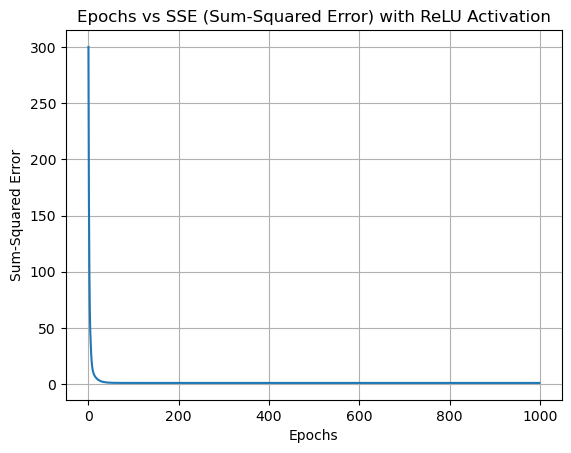

In [8]:
#ReLU
import numpy as np
import matplotlib.pyplot as plt

# ReLU Activation Function
def relu_activation(x):
    return max(0, x)

# Derivative of ReLU function for weight update
def relu_derivative(x):
    return 1 if x > 0 else 0

# Perceptron Training Function
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            # Get the prediction using ReLU activation function
            predicted = relu_activation(summation)
            # Calculate error
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # ReLU derivative for weight update
            gradient = relu_derivative(summation)
            
            # Update weights and bias using the error and gradient
            W[0] = W[0] + alpha * error * gradient  # Bias update
            W[1] = W[1] + alpha * error * gradient * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * gradient * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs (AND logic for binary values 0 and 1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set learning rate and max epochs
alpha = 0.05  # Learning rate
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Train the perceptron using ReLU activation
final_weights, epochs, errors = train_perceptron(X, y, W, alpha, max_epochs, error_threshold)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Epochs until convergence: {epochs}")

# Plotting Epochs vs SSE (Sum Squared Error)
plt.plot(range(len(errors)), errors)
plt.title("Epochs vs SSE (Sum-Squared Error) with ReLU Activation")
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.show()


A4. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates.

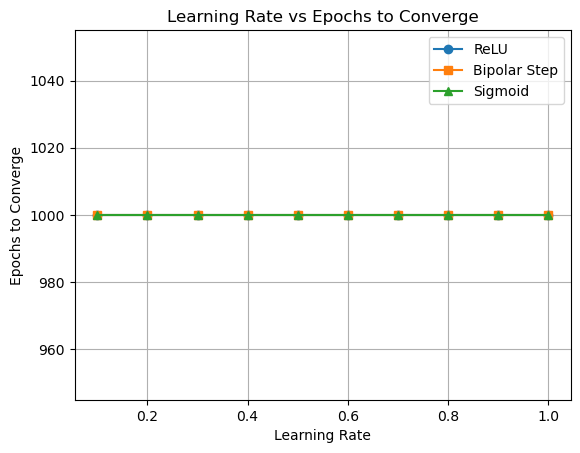

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU Activation Function and its derivative
def relu_activation(x):
    return max(0, x)

def relu_derivative(x):
    return 1 if x > 0 else 0

# Bipolar Step Activation Function
def bipolar_step_activation(x):
    return 1 if x > 0 else -1

# Sigmoid Activation Function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid for weight update
def sigmoid_derivative(x):
    return sigmoid_activation(x) * (1 - sigmoid_activation(x))

# Perceptron Training Function (supports different activation functions)
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold, activation_function, derivative_function=None):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            
            # Get the prediction using the selected activation function
            predicted = activation_function(summation)
            
            # Calculate error
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # For differentiable functions like Sigmoid and ReLU
            gradient = derivative_function(summation) if derivative_function else 1
            
            # Update weights and bias
            W[0] = W[0] + alpha * error * gradient  # Bias update
            W[1] = W[1] + alpha * error * gradient * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * gradient * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs (AND logic for binary values 0 and 1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
initial_W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set the max epochs and error threshold
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize dictionaries to store epochs for each activation function
epochs_to_converge_relu = []
epochs_to_converge_bipolar = []
epochs_to_converge_sigmoid = []

# Train the perceptron for each learning rate for each activation function
for alpha in learning_rates:
    # ReLU Activation
    W = initial_W.copy()  # Reset weights
    final_weights, epochs, _ = train_perceptron(X, y, W, alpha, max_epochs, error_threshold, relu_activation, relu_derivative)
    epochs_to_converge_relu.append(epochs)
    
    # Bipolar Step Activation
    W = initial_W.copy()  # Reset weights
    final_weights, epochs, _ = train_perceptron(X, y, W, alpha, max_epochs, error_threshold, bipolar_step_activation)
    epochs_to_converge_bipolar.append(epochs)
    
    # Sigmoid Activation
    W = initial_W.copy()  # Reset weights
    final_weights, epochs, _ = train_perceptron(X, y, W, alpha, max_epochs, error_threshold, sigmoid_activation, sigmoid_derivative)
    epochs_to_converge_sigmoid.append(epochs)

# Plot the learning rate vs number of epochs for convergence for all activations
plt.plot(learning_rates, epochs_to_converge_relu, marker='o', label="ReLU")
plt.plot(learning_rates, epochs_to_converge_bipolar, marker='s', label="Bipolar Step")
plt.plot(learning_rates, epochs_to_converge_sigmoid, marker='^', label="Sigmoid")
plt.title("Learning Rate vs Epochs to Converge")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs to Converge")
plt.legend()
plt.grid(True)
plt.show()


A5. Repeat the above exercises, A1 to A3, for XOR gate logic. 

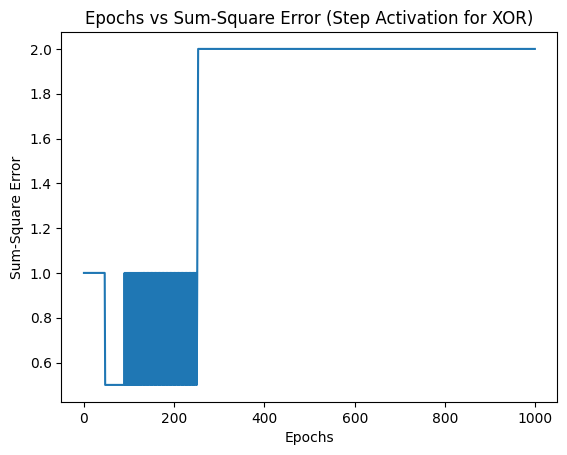

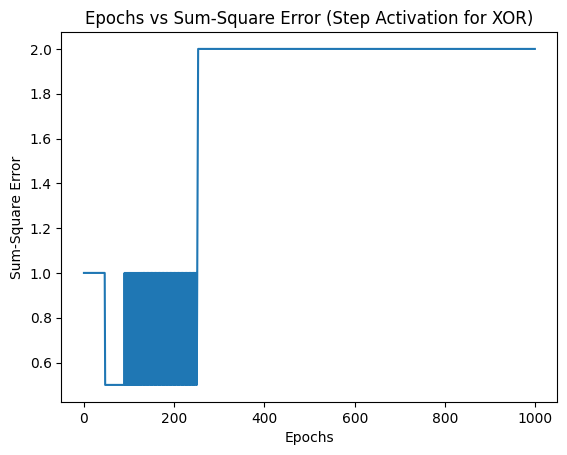

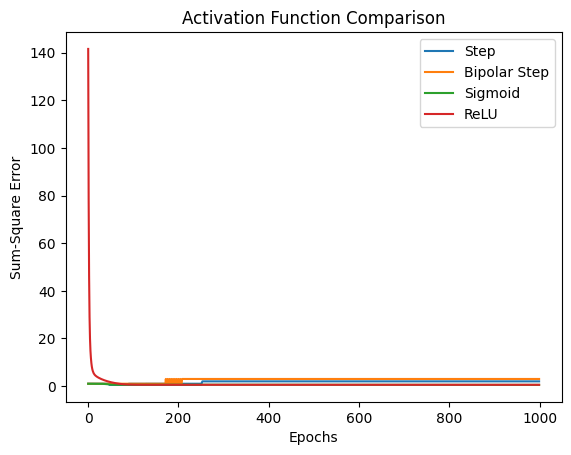

In [3]:
def summation_unit(weights, inputs):
    return sum(w * i for w, i in zip(weights, inputs))
import numpy as np

# Step Activation Function
def step_activation(x):
    return 1 if x >= 0 else 0

# Bipolar Step Activation Function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Sigmoid Activation Function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# TanH Activation Function
def tanh_activation(x):
    return np.tanh(x)

# ReLU Activation Function
def relu_activation(x):
    return max(0, x)

# Leaky ReLU Activation Function
def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x
def calculate_error(expected, output):
    return expected - output

def sum_square_error(errors):
    return sum(e**2 for e in errors) / 2
X = [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
y = [0, 1, 1, 0]
initial_weights = [10, 0.2, -0.75]

weights, epoch_errors = perceptron(X, y, step_activation, initial_weights)
def perceptron(X, y, activation_func, weights, epochs=1000, lr=0.05, convergence_error=0.002):
    epoch_errors = []
    for epoch in range(epochs):
        errors = []
        for inputs, target in zip(X, y):
            summation = summation_unit(weights, inputs)
            output = activation_func(summation)
            error = calculate_error(target, output)
            errors.append(error)
            # Update weights
            weights = [w + lr * error * inp for w, inp in zip(weights, inputs)]
        
        # Sum-squared error for this epoch
        sse = sum_square_error(errors)
        epoch_errors.append(sse)
        
        # Check for convergence
        if sse <= convergence_error:
            print(f"Converged after {epoch+1} epochs.")
            break
    
    return weights, epoch_errors
weights, epoch_errors = perceptron(X, y, step_activation, initial_weights)

# Plot the errors
import matplotlib.pyplot as plt

plt.plot(range(len(epoch_errors)), epoch_errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Sum-Square Error (Step Activation for XOR)')
plt.show()



# Plot the errors
import matplotlib.pyplot as plt

plt.plot(range(len(epoch_errors)), epoch_errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Sum-Square Error (Step Activation for XOR)')
plt.show()

# For Bipolar Step
weights_bipolar, epoch_errors_bipolar = perceptron(X, y, bipolar_step_activation, initial_weights)

# For Sigmoid
weights_sigmoid, epoch_errors_sigmoid = perceptron(X, y, sigmoid_activation, initial_weights)

# For ReLU
weights_relu, epoch_errors_relu = perceptron(X, y, relu_activation, initial_weights)

# You can repeat for TanH, Leaky ReLU as well.
plt.plot(range(len(epoch_errors)), epoch_errors, label="Step")
plt.plot(range(len(epoch_errors_bipolar)), epoch_errors_bipolar, label="Bipolar Step")
plt.plot(range(len(epoch_errors_sigmoid)), epoch_errors_sigmoid, label="Sigmoid")
plt.plot(range(len(epoch_errors_relu)), epoch_errors_relu, label="ReLU")
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Activation Function Comparison')
plt.legend()
plt.show()



A6. Use customer data provided below. Build a perceptron & learn to classify the transactions as high or low value as provided in the below table.   
Use sigmoid as the activation function. Initialize the weights & learning rate with your choice.

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perceptron forward pass (prediction)
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output)

# Function to update weights and bias (gradient descent)
def update_weights(X, y_true, y_pred, weights, bias, learning_rate):
    error = y_true - y_pred
    # Reshape error to match the dimensions correctly
    weights += learning_rate * error * X
    bias += learning_rate * error
    return weights, bias

# Perceptron training function
def train_perceptron(X_train, y_train, weights, bias, learning_rate, n_epochs):
    for epoch in range(n_epochs):
        for i in range(len(X_train)):
            # Get prediction for each training instance
            y_pred = predict(X_train[i], weights, bias)
            # Update weights and bias
            weights, bias = update_weights(X_train[i], y_train[i], y_pred, weights, bias, learning_rate)
    return weights, bias

# Evaluate the perceptron on test data
def evaluate(X_test, y_test, weights, bias):
    correct_predictions = 0
    for i in range(len(X_test)):
        y_pred = predict(X_test[i], weights, bias)
        y_pred_class = 1 if y_pred > 0.5 else 0
        if y_pred_class == y_test[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(X_test)
    return accuracy

# Manually creating the dataset from the provided table
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 1, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = df['High Value Tx'].values

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize weights and bias
n_features = X_train.shape[1]
weights = np.random.rand(n_features)
bias = np.random.rand(1)
learning_rate = 0.01
n_epochs = 1000

# Train the perceptron
weights, bias = train_perceptron(X_train, y_train, weights, bias, learning_rate, n_epochs)

# Evaluate the model
accuracy = evaluate(X_test, y_test, weights, bias)
print(f"Perceptron classification accuracy: {accuracy * 100:.2f}%")


Perceptron classification accuracy: 50.00%


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import pinv

# Manually creating the dataset from the provided table
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 1, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = df['High Value Tx'].values

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Append bias term (column of ones) to the features
X_train_bias = np.c_[X_train, np.ones(X_train.shape[0])]
X_test_bias = np.c_[X_test, np.ones(X_test.shape[0])]

# Compute the weights using pseudo-inverse
weights_pseudo_inverse = np.dot(pinv(X_train_bias), y_train)

# Function to evaluate the pseudo-inverse model
def evaluate_pseudo_inverse(X_test_bias, y_test, weights):
    correct_predictions = 0
    y_preds = []
    for i in range(len(X_test_bias)):
        y_pred = np.dot(X_test_bias[i], weights)
        y_pred_class = 1 if y_pred > 0.5 else 0
        y_preds.append(y_pred_class)
        if y_pred_class == y_test[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(X_test_bias)
    return accuracy

# Evaluate pseudo-inverse solution
accuracy_pseudo_inverse = evaluate_pseudo_inverse(X_test_bias, y_test, weights_pseudo_inverse)
print(f"Pseudo-inverse classification accuracy: {accuracy_pseudo_inverse * 100:.2f}%")


Pseudo-inverse classification accuracy: 50.00%


A8. Develop the below Neural Network. Use learning rate (α) = 0.05  with a Sigmoid activation 
function. Learn the weights of the network using back-propagation algorithm to implement above 
provided AND gate logic.

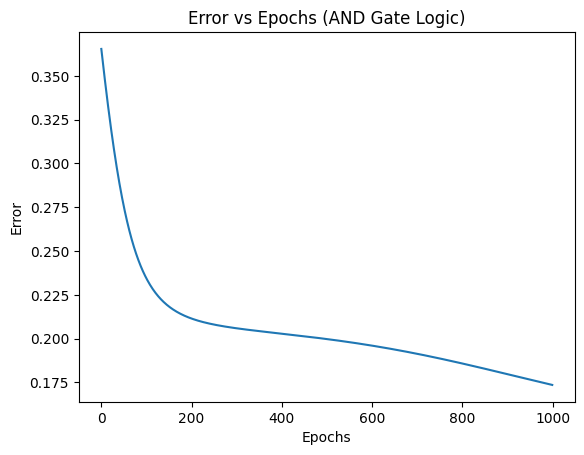

Predictions after training:
[[0.25310419]
 [0.26857107]
 [0.30403717]
 [0.31774809]]


In [4]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)
class NeuralNetwork:
    def __init__(self):
        # Initialize weights with random values
        self.input_layer_size = 2
        self.hidden_layer_size = 2
        self.output_layer_size = 1
        
        # Initialize weights
        self.W1 = np.random.rand(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.rand(self.hidden_layer_size, self.output_layer_size)

        # Initialize learning rate
        self.learning_rate = 0.05
    
    def forward(self, X):
        # Forward pass through the network
        self.z1 = np.dot(X, self.W1)  # Input to hidden layer
        self.a1 = sigmoid(self.z1)    # Activation of hidden layer
        self.z2 = np.dot(self.a1, self.W2)  # Input to output layer
        self.output = sigmoid(self.z2)  # Output prediction
        
        return self.output
    
    def backward(self, X, y):
        # Error in output layer
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        # Error in hidden layer
        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.a1)

        # Update weights
        self.W2 += self.a1.T.dot(output_delta) * self.learning_rate
        self.W1 += X.T.dot(hidden_delta) * self.learning_rate
        
        # Return sum-square error
        return np.mean(output_error**2)
    
    def train(self, X, y, epochs=1000, convergence_error=0.002):
        epoch_errors = []
        for epoch in range(epochs):
            self.forward(X)
            error = self.backward(X, y)
            epoch_errors.append(error)
            
            # Check convergence
            if error <= convergence_error:
                print(f"Converged after {epoch+1} epochs.")
                break
                
        return epoch_errors
# Input (AND Gate Truth Table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output (AND Gate Truth Table)
y = np.array([[0], [0], [0], [1]])
# Instantiate the neural network
nn = NeuralNetwork()

# Train the network and get the epoch-wise error
errors = nn.train(X, y)

# Plot the errors over epochs
import matplotlib.pyplot as plt

plt.plot(range(len(errors)), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs (AND Gate Logic)')
plt.show()
# Test the trained network on the AND gate inputs
predictions = nn.forward(X)
print("Predictions after training:")
print(predictions)


Did not converge within the maximum number of epochs


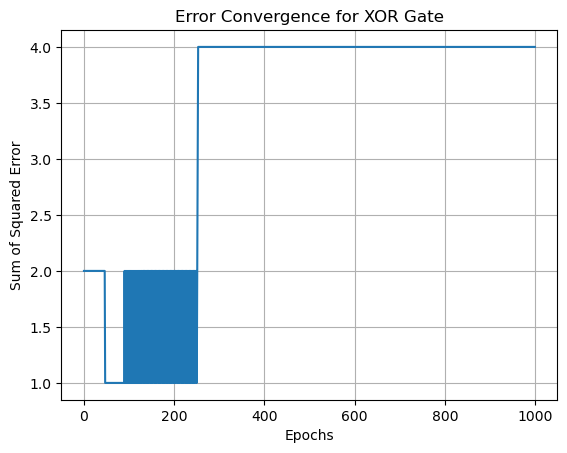

Final weights: W0 = 0.09999999999999236, W1 = -0.09999999999999969, W2 = -0.09999999999999969


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input and output
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([0, 1, 1, 0])

# Initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Summation unit
def summation_unit(x1, x2, w0, w1, w2):
    return w0 + (w1 * x1) + (w2 * x2)

# Error calculation
def calculate_error(predicted, actual):
    return actual - predicted

# Training the perceptron
def train_perceptron(inputs, outputs, w0, w1, w2, learning_rate, max_epochs=1000, error_threshold=0.002):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Compute summation
            x1, x2 = inputs[i]
            summation = summation_unit(x1, x2, w0, w1, w2)
            
            # Apply activation function
            prediction = step_activation(summation)
            
            # Calculate error
            error = calculate_error(prediction, outputs[i])
            total_error += error ** 2
            
            # Update weights
            w0 += learning_rate * error * 1  # bias update
            w1 += learning_rate * error * x1
            w2 += learning_rate * error * x2
        
        # Track the sum of squared errors
        errors.append(total_error)
        
        # Check for convergence
        if total_error <= error_threshold:
            print(f'Converged after {epoch + 1} epochs')
            break
    else:
        print('Did not converge within the maximum number of epochs')
    
    return w0, w1, w2, errors

# Running the training process
final_w0, final_w1, final_w2, error_history = train_perceptron(inputs, outputs, W0, W1, W2, learning_rate)

# Plotting epochs vs error
plt.plot(range(len(error_history)), error_history)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Error')
plt.title('Error Convergence for XOR Gate')
plt.grid(True)
plt.show()

# Final weights
print(f'Final weights: W0 = {final_w0}, W1 = {final_w1}, W2 = {final_w2}')


Did not converge within the maximum number of epochs


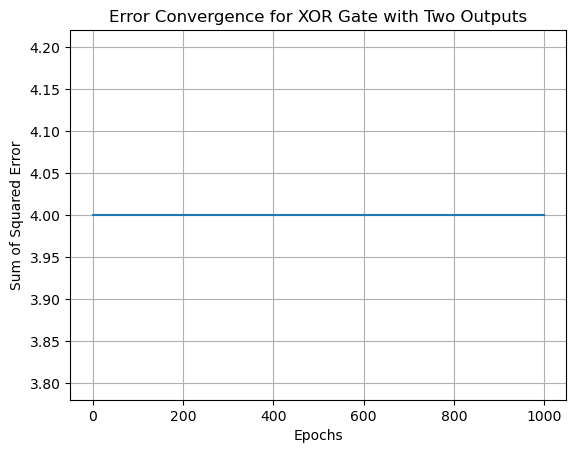

Final weights: W0 = 10.0, W1 = 0.2, W2 = -0.75


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input and corresponding two-output representation
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

# Expected outputs: [O1, O2]
outputs = np.array([[1, 0],  # For XOR 0
                    [0, 1],  # For XOR 1
                    [0, 1],  # For XOR 1
                    [1, 0]]) # For XOR 0

# Initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Summation unit
def summation_unit(x1, x2, w0, w1, w2):
    return w0 + (w1 * x1) + (w2 * x2)

# Error calculation for multi-output
def calculate_error(predicted, actual):
    return actual - predicted

# Training the perceptron with two output nodes
def train_perceptron(inputs, outputs, w0, w1, w2, learning_rate, max_epochs=1000, error_threshold=0.002):
    errors = []
    weights = np.array([w0, w1, w2])  # Weights initialization for both outputs
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            x1, x2 = inputs[i]
            output1 = step_activation(summation_unit(x1, x2, *weights))
            output2 = 1 - output1  # Inverse for second output as XOR has opposite mapping
            
            predicted = np.array([output1, output2])
            actual = outputs[i]
            
            # Calculate error
            error = calculate_error(predicted, actual)
            total_error += np.sum(error ** 2)
            
            # Update weights based on errors
            weights[0] += learning_rate * np.sum(error) * 1  # bias update
            weights[1] += learning_rate * np.sum(error) * x1
            weights[2] += learning_rate * np.sum(error) * x2
        
        errors.append(total_error)
        
        # Check for convergence
        if total_error <= error_threshold:
            print(f'Converged after {epoch + 1} epochs')
            break
    else:
        print('Did not converge within the maximum number of epochs')
    
    return weights, errors

# Running the training process
final_weights, error_history = train_perceptron(inputs, outputs, W0, W1, W2, learning_rate)

# Plotting epochs vs error
plt.plot(range(len(error_history)), error_history)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Error')
plt.title('Error Convergence for XOR Gate with Two Outputs')
plt.grid(True)
plt.show()

# Final weights
print(f'Final weights: W0 = {final_weights[0]}, W1 = {final_weights[1]}, W2 = {final_weights[2]}')


A11. Learn using a MLP network from Sci-Kit manual available at https://scikit-learn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate exercises using MLPClassifier() function.

In [4]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define AND gate inputs and outputs
and_inputs = np.array([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

and_outputs = np.array([0, 0, 0, 1])  # AND gate truth table

# Define XOR gate inputs and outputs
xor_inputs = np.array([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

xor_outputs = np.array([0, 1, 1, 0])  # XOR gate truth table

# Function to train and evaluate MLPClassifier
def train_mlp_classifier(inputs, outputs, hidden_layer_sizes=(2,), activation='logistic', learning_rate=0.05, max_iter=1000):
    # Initialize MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        learning_rate_init=learning_rate,
                        max_iter=max_iter,
                        solver='sgd',  # Stochastic Gradient Descent
                        random_state=1)
    
    # Fit the model
    mlp.fit(inputs, outputs)
    
    # Print the results
    predictions = mlp.predict(inputs)
    print(f"Predictions: {predictions}")
    print(f"Accuracy: {mlp.score(inputs, outputs)}")
    
    # Return the trained model
    return mlp

# Training MLPClassifier on AND gate
print("AND Gate MLPClassifier Results:")
and_mlp = train_mlp_classifier(and_inputs, and_outputs, hidden_layer_sizes=(2,), activation='logistic')

# Training MLPClassifier on XOR gate
print("\nXOR Gate MLPClassifier Results:")
xor_mlp = train_mlp_classifier(xor_inputs, xor_outputs, hidden_layer_sizes=(2,), activation='logistic')


AND Gate MLPClassifier Results:
Predictions: [0 0 0 1]
Accuracy: 1.0

XOR Gate MLPClassifier Results:
Predictions: [1 1 1 1]
Accuracy: 0.5


A12. Use the MLPClassifier() function on your project dataset.

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Customer data: Number of Candies, Mangoes, Milk Packets
X = np.array([
    [20, 6, 2],  # C_1
    [16, 3, 6],  # C_2
    [27, 6, 2],  # C_3
    [19, 1, 2],  # C_4
    [24, 4, 2],  # C_5
    [22, 1, 5],  # C_6
    [15, 4, 2],  # C_7
    [18, 4, 2],  # C_8
    [21, 1, 4],  # C_9
    [16, 2, 4]   # C_10
])

# Target: High Value Transaction (1 for 'Yes', 0 for 'No')
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # Yes -> 1, No -> 0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and configure the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,),  # One hidden layer with 5 neurons
                    activation='logistic',    # Sigmoid activation function
                    learning_rate_init=0.05,  # Initial learning rate
                    max_iter=1000,            # Maximum number of iterations
                    solver='sgd',             # Stochastic Gradient Descent
                    random_state=1)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=['Low Value', 'High Value']))


Accuracy: 0.67
              precision    recall  f1-score   support

   Low Value       0.67      1.00      0.80         2
  High Value       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
